<a href="https://colab.research.google.com/github/kanhaz-spec/MACHINE-LEARNING/blob/main/_8A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
        f1_score, roc_auc_score, confusion_matrix,
            classification_report, roc_curve
            )
import seaborn as sns

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target
print("Feature names:", data.feature_names)
print("Target classes:", data.target_names)
print("\nDataset shape:", X.shape)

Feature names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Target classes: ['malignant' 'benign']

Dataset shape: (569, 30)


In [3]:
X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.2, random_state=42, stratify=y
      )

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
base_tree = DecisionTreeClassifier(max_depth=1, random_state=42)
ada_model = AdaBoostClassifier(
    estimator=base_tree,
        n_estimators=100,
            learning_rate=1.0,
                random_state=42
                )

In [6]:
ada_model.fit(X_train, y_train)


y_pred = ada_model.predict(X_test)
y_prob = ada_model.predict_proba(X_test)[:, 1]

In [7]:
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\n=== AdaBoost Classifier Evaluation ===")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print(f"ROC AUC Score  : {roc_auc:.4f}")


=== AdaBoost Classifier Evaluation ===
Accuracy       : 0.9561
Precision      : 0.9467
Recall         : 0.9861
F1 Score       : 0.9660
ROC AUC Score  : 0.9818


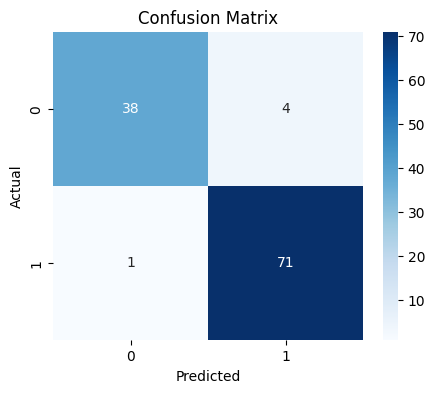

In [8]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

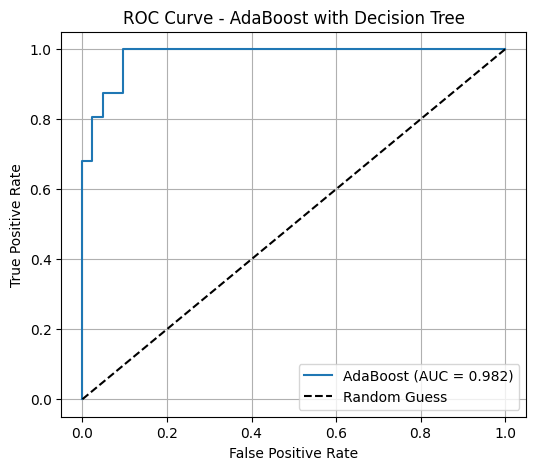

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost with Decision Tree")
plt.legend(loc='lower right')
plt.grid(True)
plt.show()